In [763]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine,euclidean

%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 5,5

# Parabola

In [778]:
x = np.linspace(-100,100,100)
a = 0.01
b = -0.5
c = 10
y = a*(x**2) + b*x + c

Text(2, 12, 'RSS=0.01$\\beta_1^2 - 0.5\\beta_1$ + 10')

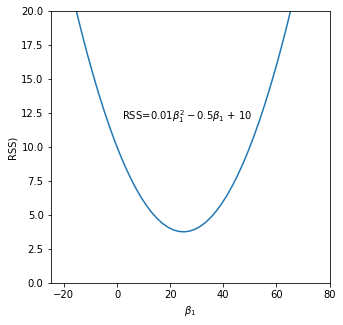

In [794]:
plt.plot(x,y)
plt.xlim(-25,80)
plt.ylim(0,20)
plt.xlabel(r'$\beta_1$')
plt.ylabel('RSS)')
plt.text(2,12,r'RSS=0.01$\beta_1^2 - 0.5\beta_1$ + 10')

# Loss function for regression

In [709]:
def regression_margin(y_i, y_hat_i):
    return y_i - y_hat_i

def squared_error(y_i, y_hat_i, delta):
    margin = regression_margin(y_i, y_hat_i)
    return margin**2
def absolute_error(y_i, y_hat_i, delta):
    margin = regression_margin(y_i, y_hat_i)
    return abs(margin)
def huber_error(y_i, y_hat_i, delta):
    margin = regression_margin(y_i, y_hat_i)
    if abs(margin) <= delta:
        return squared_error(y_i, y_hat_i, delta)
    else:
        return 2 * delta * absolute_error(y_i, y_hat_i, delta) - delta**2
def loss_array(y, y_hat, loss_func, delta=0):
    assert len(y) == len(y_hat)
    result = []
    for i in range(len(y)):
        result.append(loss_func(y[i], y_hat[i], delta))
    return np.array(result)

def sort_margin(margin, loss):
    z1 = list(zip(margin, loss))
    z1.sort()
    margin_sort = [z[0] for z in z1]
    loss_sort = [z[1] for z in z1]
    return margin_sort, loss_sort

In [710]:
y = np.random.normal(100,10,500)
y_hat = np.random.normal(100,10,500)

In [711]:
margin = y - y_hat
squared_loss =  loss_array(y, y_hat, squared_error)
absolute_loss = loss_array(y, y_hat, absolute_error)
huber_loss =    loss_array(y, y_hat, huber_error, delta = 10)

margin_squared_loss =sort_margin(margin, squared_loss)
margin_absolute_loss =sort_margin(margin, absolute_loss)
margin_huber_loss =sort_margin(margin, huber_loss)

(0, 40)

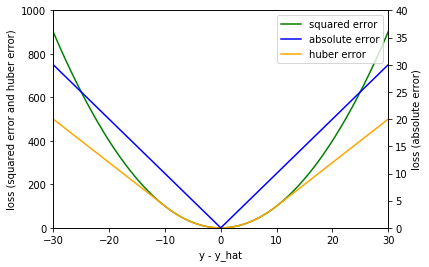

In [712]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ln1 = ax1.plot(margin_squared_loss[0],margin_squared_loss[1], 'g', label="squared error")
ln2 = ax2.plot(margin_absolute_loss[0],margin_absolute_loss[1] , 'b',label="absolute error")
ln3 = ax1.plot(margin_huber_loss[0],margin_huber_loss[1],'orange',label="huber error")

lns = ln1+ln2+ln3
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc=1)

ax1.set_xlabel('y - y_hat')
ax1.set_ylabel('loss (squared error and huber error)')
ax2.set_ylabel('loss (absolute error)')

ax1.set_xlim(-30,30)
ax1.set_ylim(0,1000)
ax2.set_ylim(0,40)

# Loss function for binary classification

In [796]:
def get_p(y, y_hat, c1, c2):
    N = len(y)
    p1 = np.sum(y_hat == c1) / N
    p2 = np.sum(y_hat == c2) / N
    assert abs(p1 + p2-1) < 1e-6
    return p1, p2

def cross_entropy_loss(y, y_hat, c1, c2):
    p1, p2 = get_p(y, y_hat, c1, c2 )
    # natural log
    return - p1 * np.log(p1) - p2 * np.log(p2)

def gini_index_loss(y, y_hat, c1, c2):
    p1, p2 = get_p(y, y_hat, c1, c2)
    return p1*(1-p1) + p2*(1-p2)

def misclassification_loss(y, y_hat, c1, c2):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    N = len(y)
    for i in range(N):
        y_i = y[i]
        y_hat_i = y_hat[i]
        if (y_i == c1) and (y_hat_i == c1):
            tp += 1
        elif (y_i == c2) and (y_hat_i == c2):
            tn += 1
        elif (y_i == c1) and (y_hat_i == c2):
            fn += 1
        elif (y_i == c2) and (y_hat_i == c1):
            fp += 1
    # compute misclassification rate for each class
    mis_c1 = fp / (fp + tp)
    mis_c2 = fn / (fn + tn)
    return min(mis_c1, mis_c2)

In [797]:
def generate_y_with_p(p1, c1, c2):
    y = np.random.choice([c1,c2], size=1000, replace=True, p = [p1, 1-p1])
    y_hat = np.random.choice([c1, c2], size=1000, replace=True, p = [p1, 1-p1])
    return y, y_hat

In [798]:
ps = np.linspace(0.01,0.99,1001)
cross_entropy_losses = []
gini_index_losses =[]
misclassification_losses =[]
c1 = 1
c2 = -1
for p in ps:
    y, y_hat = generate_y_with_p(p, c1, c2)
    ce = cross_entropy_loss(y, y_hat, c1, c2)
    gi = gini_index_loss(y, y_hat, c1, c2)
    mc = misclassification_loss(y, y_hat, c1, c2)
    cross_entropy_losses.append(ce)
    gini_index_losses.append(gi)
    misclassification_losses.append(mc)

In [799]:
# rescale cross entropy
cross_entropy_losses_max = max(cross_entropy_losses)
cross_entropy_losses = [ce * 0.5 / cross_entropy_losses_max for ce in cross_entropy_losses] 

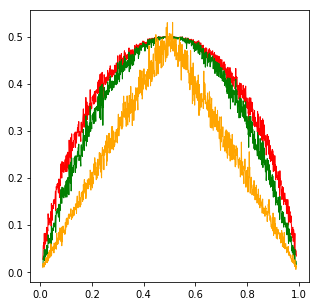

In [800]:
# cannot reproduce misclassification erropr
plt.plot(ps, cross_entropy_losses, c='r', linewidth=1, label='cross entropy')
plt.plot(ps, gini_index_losses,c= 'g',linewidth=1,  label='gini index')
plt.plot(ps, misclassification_losses, c='orange',linewidth=1,  label='misclassification')
# plt.legend(loc=1)

In [801]:
def classification_margin(y_i, y_hat_i):
    # c1 = 1, c2 = -1
    return y_i * y_hat_i

def exponential_error(y_i, y_hat_i):
    margin = classification_margin(y_i, y_hat_i)
    return np.exp(- margin)

def misclassification_error(y_i, y_hat_i):
    # for 1 -1 case
    margin = classification_margin(y_i, y_hat_i)
    if margin > 0: return 0# or 0
    elif margin < 0: return 1
    # margin should not be 0
    
def binomial_deviance_error(y_i, y_hat_i):
    margin = classification_margin(y_i, y_hat_i)
    return np.log(1 + np.exp(-2 *margin))

def loss_array_classification(y, y_hat, loss_func):
    assert len(y) == len(y_hat)
    result = []
    for i in range(len(y)):
        result.append(loss_func(y[i], y_hat[i]))
    return np.array(result)

def sort_margin(margin, loss):
    z1 = list(zip(margin, loss))
    z1.sort()
    margin_sort = [z[0] for z in z1]
    loss_sort = [z[1] for z in z1]
    return margin_sort, loss_sort

In [802]:
p1 = 0.3
y = np.random.choice([c1,c2], size=200, replace=True, p = [p1, 1-p1])
y_hat = y_hat = np.random.normal(0.5,1,200)
margin = y * y_hat
exp_loss = loss_array_classification(y, y_hat,exponential_error)
mis_loss = loss_array_classification(y, y_hat,misclassification_error)
dev_loss = loss_array_classification(y, y_hat,binomial_deviance_error)
squared_loss = loss_array(y, y_hat,squared_error)

margin_exp_loss = sort_margin(margin, exp_loss)
margin_mis_loss = sort_margin(margin, mis_loss)
margin_dev_loss = sort_margin(margin, dev_loss )
margin_squared_loss = sort_margin(margin, squared_loss )

Text(0, 0.5, 'loss')

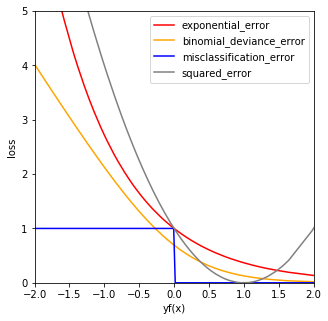

In [803]:
plt.plot(margin_exp_loss[0],margin_exp_loss[1], c='r',label='exponential_error')
plt.plot(margin_dev_loss[0],margin_dev_loss[1], c= 'orange', label = 'binomial_deviance_error')
plt.plot(margin_mis_loss[0],margin_mis_loss[1], c= 'blue',label ='misclassification_error')
plt.plot(margin_squared_loss[0],margin_squared_loss[1], c= 'grey', label='squared_error')
plt.legend(loc=1)
plt.xlim(-2,2)
plt.ylim(0,5)
plt.xlabel('yf(x)')
plt.ylabel('loss')